In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

from load_data import load_data_using_sqlalchemy
from scripts.user_experience_analysis import TelecomUserExperience


c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\notebooks
c:\Users\HP\Documents\10-Academy\Telecom-WEEK2


In [2]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [3]:
# Initialize the class with the DataFrame
experience_analysis = TelecomUserExperience(df)

In [4]:
# Perform aggregation
customer_data = experience_analysis.aggregate_per_customer()
# Display the aggregated data
print(customer_data)

        MSISDN/Number  Average TCP Retransmission  Average RTT  \
0        3.360100e+10                1.078479e+07    23.000000   
1        3.360100e+10                1.078479e+07    15.500000   
2        3.360100e+10                1.078479e+07    63.729294   
3        3.360101e+10                3.803623e+05    42.000000   
4        3.360101e+10                7.735101e+06    29.750000   
...               ...                         ...          ...   
106851   3.379000e+10                1.090225e+05    26.000000   
106852   3.379000e+10                1.078479e+07    20.000000   
106853   3.197021e+12                1.078479e+07    63.729294   
106854   3.370000e+14                1.078479e+07    63.729294   
106855   8.823971e+14                1.078479e+07    63.729294   

        Average Throughput                      Handset Type  
0                38.000000    Huawei P20 Lite Huawei Nova 3E  
1                49.500000            Apple iPhone 7 (A1778)  
2                4

In [5]:
#  Compute & list 10 of the top, bottom, and most frequent:
experience_analysis.analyze_metrics()

TCP - Top 10:
 51560    34042618.5
85824    33807326.5
96139    33774490.5
39121    33749802.5
97327    33672115.5
89342    33516470.5
27236    33368998.5
67635    33292737.0
84217    33267078.0
96230    33258328.5
Name: Average TCP Retransmission, dtype: float64
TCP - Bottom 10:
 23472     48.5
6359      64.0
96977     64.5
13546     67.0
2177      71.5
25863     88.0
102198    88.0
105775    88.5
78100     89.5
89395     91.0
Name: Average TCP Retransmission, dtype: float64
TCP - Most Frequent 10:
 Average TCP Retransmission
1.078479e+07    55974
1.040560e+07      367
1.040562e+07      167
3.804943e+05      145
1.059520e+07       82
1.040562e+07       81
3.811593e+05       78
3.798753e+05       78
3.798483e+05       70
1.040629e+07       65
Name: count, dtype: int64

RTT - Top 10:
 32291    258.0
66760    252.0
95445    248.5
46358    248.0
86346    244.5
25725    244.0
48455    241.5
94970    240.5
43683    239.5
34214    238.0
Name: Average RTT, dtype: float64
RTT - Bottom 10:
 288

TCP Retransmission
Top 10 Values: These represent the highest average TCP retransmission volumes, indicating high network retransmissions which could be a sign of network congestion or packet loss. Such high values might be associated with less optimal network conditions or specific issues with network stability for these customers.

Bottom 10 Values: These are the lowest average TCP retransmission volumes. Low values indicate better network performance with fewer retransmissions, suggesting that these customers are experiencing relatively stable network conditions.

Most Frequent Values: The most common TCP retransmission volumes show a range of frequently occurring values. High frequency of certain values might indicate a common network condition or issue affecting many users, or it might reflect the typical network environment.

RTT (Round Trip Time)
Top 10 Values: High RTT values suggest longer delays in network responses, which can impact user experience negatively. Long RTT can be indicative of network congestion, high latency, or issues with routing.

Bottom 10 Values: Low RTT values indicate quicker response times, which is ideal for applications requiring real-time interactions. These users are likely experiencing better network performance with lower latency.

Most Frequent Values: The most frequent RTT values reflect common network conditions experienced by a large portion of users. High frequency in certain RTT values could highlight typical latency issues that may need addressing.

Throughput
Top 10 Values: High throughput values signify faster data transfer rates, which contribute to better user experience, especially for data-intensive applications like streaming or large downloads.

Bottom 10 Values: Low throughput values point to slower data transfer rates, which could affect the quality of internet services, such as streaming, browsing, or other online activities. These low values may be indicative of network issues or limitations.

Most Frequent Values: The most common throughput values show the typical speeds experienced by users. Frequent values may reveal common network performance levels and highlight areas where improvements are needed or where performance is generally satisfactory.

Summary of Insights
High TCP Retransmission: High retransmissions often correlate with network issues or congestion. Customers experiencing high retransmissions may face degraded performance, suggesting areas for network improvement.

High RTT: High RTT values indicate potential network latency issues. Addressing these could improve the responsiveness of services and overall user satisfaction.

Low Throughput: Low throughput affects the quality of online activities. Identifying and addressing factors leading to low throughput is crucial for improving user experience.

Most Frequent Values: Analyzing these helps identify common network conditions and performance levels experienced by the majority of users. This can guide targeted improvements or optimizations.

Benchmarking: Comparing the top and bottom values against most frequent values provides a benchmark for network performance. This comparison can help identify discrepancies and focus on areas needing enhancement.

In [6]:
experience_analysis.compute_distribution()
experience_analysis.report_distribution()

Average Throughput per Handset Type:
Handset Type
Oppo Cph1723                        35334.0
Huawei Aum-Al00                     33912.0
Samsung Galaxy S9+                  33691.5
Huawei Y6 Prime 2018                33575.5
Huawei Hwi-Al00                     32640.5
                                     ...   
Samsung Gt-S6310N                       1.0
Quectel Wireless. Quectel Ec21-E        1.0
Quectel Wireless. Quectel Ec25-E        0.5
Wct Uno                                 0.0
Lg Lg-T385                              0.0
Name: Average Throughput, Length: 1396, dtype: float64

Average TCP Retransmission per Handset Type:
Handset Type
Huawei E587 E587U-2 Turkcell Vinnwifi E587    31542701.00
Zyxel Communicat. Sbg3600                     26743469.00
Samsung Galaxy Core 2 (Sm-G355X)              23279503.50
Sierra Wireless Usb305                        21662475.25
A-Link Telecom I. Cubot Note S                20705865.50
                                                 ...     
Oppo

c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\Documents\10-Academy\Telecom-WEEK2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\U


Cluster Centers (Original Scale):
   Average TCP Retransmission  Average Throughput  Cluster
0                2.880152e+06        17233.117268        0
1                1.067558e+07          496.580306        1
2                2.471696e+06         4695.252400        2

Cluster 0:
Average TCP Retransmission: 2878965.32
Average Throughput: 17216.86

Cluster 1:
Average TCP Retransmission: 10675930.43
Average Throughput: 496.23

Cluster 2:
Average TCP Retransmission: 2472665.41
Average Throughput: 4687.08


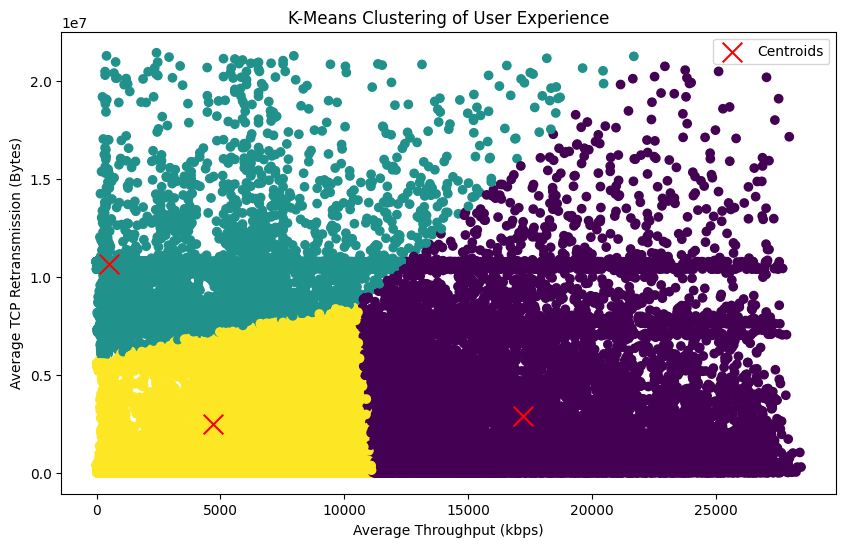

In [7]:
# Performing clustering
experience_analysis.perform_clustering(k=3)

Cluster Descriptions
Cluster 0: High Throughput, Moderate TCP Retransmission

Average TCP Retransmission: 2,879,965.32 Bytes
Average Throughput: 17,216.86 kbps
Description: Users in Cluster 0 generally experience higher average throughput compared to other clusters, indicating better data transfer rates. However, their average TCP retransmission volume is moderate. This suggests that these users are likely on relatively high-performance devices or networks that support good data transfer speeds but still encounter some network reliability issues.

Cluster 1: Low Throughput, Very High TCP Retransmission

Average TCP Retransmission: 10,675,930.43 Bytes
Average Throughput: 496.23 kbps
Description: Cluster 1 represents users with very low average throughput, indicating poor data transfer rates. These users also experience very high TCP retransmission volumes, which suggests significant network reliability issues. This cluster may include users with older or less capable devices and/or poor network conditions leading to frequent retransmissions and slow data speeds.

Cluster 2: Moderate Throughput, Low TCP Retransmission

Average TCP Retransmission: 2,472,665.41 Bytes
Average Throughput: 4,687.08 kbps
Description: Users in Cluster 2 experience moderate throughput and low TCP retransmission. This suggests that these users generally have a balanced network performance with decent data transfer rates and relatively stable network conditions. They may be using devices or network setups that offer a good compromise between speed and reliability.

Summary
Cluster 0: High throughput with moderate retransmission indicates good performance but room for improvement in network reliability.
Cluster 1: Low throughput and high retransmission suggest poor network performance and potentially outdated or inadequate hardware.
Cluster 2: Moderate throughput with low retransmission points to balanced performance and stability, making this group relatively satisfied with their network experience.